### **利用geopandas进行矢量数据快速读、写、及可视化.**
官方网址：https://geopandas.org/en/stable/#   
geopandas是用来处理地理空间数据的python第三方库，它是在pandas的基础上建立的，融合了pandas的数据类型，并且提供了操作地理空间数据的高级接口，使得在python中进行GIS操作变成可能。


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
path_kunming = 'data/Section-6/kunming_districts.geojson'

1. 读入矢量数据

In [4]:
kunming_gpd = gpd.read_file(path_kunming)
kunming_gpd.head()


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,cn_adcode,area(km2),geometry
0,530102,wuhua,530100,kunming,530000,100000,377.995979,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,530103,panlong,530100,kunming,530000,100000,864.295297,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,guandu,530100,kunming,530000,100000,638.333617,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,xishan,530100,kunming,530000,100000,897.396732,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,dongchuan,530100,kunming,530000,100000,1866.117588,"MULTIPOLYGON (((102.80340 26.30291, 102.80537 ..."


2. 可视化矢量数据

In [5]:
ids_chenggong = np.where(kunming_gpd['dt_name'] == 'chenggong')[0]
kunming_gpd.iloc[ids_chenggong,:]


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,cn_adcode,area(km2),geometry
5,530114,chenggong,530100,kunming,530000,100000,499.363964,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."


Text(0.5, 1.0, 'chenggong')

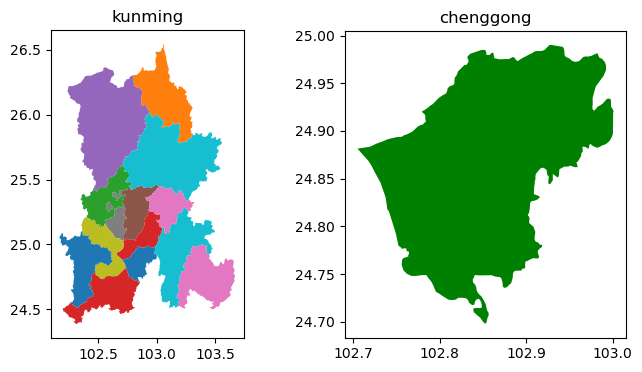

In [6]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
### 昆明区域
kunming_gpd.plot(ax=ax[0], column='dt_name')
ax[0].set_title('kunming')
### 呈贡区域
id_chenggong = np.where(kunming_gpd['dt_name'] == 'chenggong')[0]
kunming_chenggong_gpd = kunming_gpd.iloc[id_chenggong]
kunming_chenggong_gpd.plot(ax=ax[1], color='green')
ax[1].set_title('chenggong')


3. 矢量数据裁剪

<Axes: >

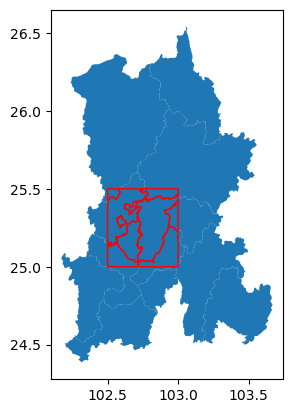

In [7]:
## 1. 定义裁剪区域geopandas对象
from shapely.geometry import Polygon
dict = {'name': ['region1'], 
        'geometry': [Polygon([(102.5,25), (102.5,25.5), (103, 25.5), (103, 25)])]}
region_gpd = gpd.GeoDataFrame(dict, crs="EPSG:4326")
region_clip = kunming_gpd.clip(region_gpd)
region_clip
ax = kunming_gpd.plot()
region_clip.plot(ax=ax, facecolor='none', edgecolor='red')


4. 矢量数据合并

<Axes: >

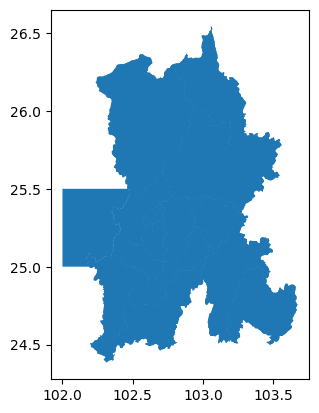

In [10]:
dict = {'name': ['region1'], 
        'geometry': [Polygon([(102,25), (102,25.5), (103, 25.5), (103, 25)])]}
region_gpd = gpd.GeoDataFrame(dict, crs="EPSG:4326")
region_union = kunming_gpd.overlay(region_gpd, how='union')
ax = kunming_gpd.plot()
region_union.plot(ax=ax)


5. 几何包含判断

In [11]:
from shapely.geometry import Point
pt1 = Point(102.5, 25)
print(kunming_gpd.geometry[0].contains(pt1))
# print(kunming_gpd.contains(pt1))


False


**6. 写出矢量文件**   
6.1. 写出只含有特定字段(name)的矢量文件

In [12]:
path_kunming_out_1 = 'data/Section-4/gpd_vector_out_1.shp'
kunming_out_1 = kunming_gpd[['dt_name', 'geometry']]
kunming_out_1.head()


,dt_name,geometry
0,wuhua,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,panlong,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,guandu,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,xishan,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,dongchuan,"MULTIPOLYGON (((102.80340 26.30291, 102.80537 ..."


In [13]:
kunming_out_1.to_file(path_kunming_out_1)

6.2 写出只含有特定特征（呈贡区）矢量文件


In [14]:
path_kunming_out_2 = 'data/Section-4/gpd_vector_out_2.shp'
kunming_out_2 = kunming_gpd.iloc[id_chenggong]
kunming_out_2

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,cn_adcode,area(km2),geometry
5,530114,chenggong,530100,kunming,530000,100000,499.363964,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."


In [15]:
kunming_out_2.to_file(path_kunming_out_2)
